In [1]:
# This is use to manipulate numerical functions
import numpy as np
# This Pandas Library use data manipulation and analysis
import pandas as pd 
# This is use to data visualization
import matplotlib.pyplot as plt
# This use to create attractive high level visualization
import seaborn as sns
import cv2
# This use to accessing file directories with and operating system in python 
import os
# This helps to find all the pathnames
import glob as gb
# This used to easier the progress of time-consuming tasks
from tqdm import tqdm
# This is the open source machine learning tool developed by google and it gives the tools for building and training deep neural network
import tensorflow as tf
# This is use to built on top of NumPy and provides additional functionality for scientific and engineering computations
import scipy as scipy

C:\Users\Hasitha\AppData\Local\Temp\ipykernel_28812\3443175317.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# defining train data set
# This ImageDataGenerator normally used in Tensorfor Keras library for data augementing and preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting up process of the DataGenerator
train_dir='C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\data'
Train_Data=tf.keras.preprocessing.image.ImageDataGenerator(
    # Randomly flips images horizontally during training (data augmentation)
    horizontal_flip=True,
    # Scales pixel values to the range [0,1]
    rescale=1/255.0,
).flow_from_directory(train_dir,batch_size=16,subset="training",target_size=(224,224),shuffle=False)

# batch_size=16: Determines the batch size for training.
# subset="training": Indicates that this data generator is for the training subset.
# target_size=(224,224): Resizes input images to a consistent size of 224x224 pixels.
# shuffle=False: Disables shuffling of data within each batch during training.

Found 75 images belonging to 5 classes.


In [3]:
# Print the data classes which mentioned including the datasets
list(Train_Data.class_indices.keys())

['Anagi', 'Hasitha', 'Ramith', 'Sankalpa', 'Shakya']

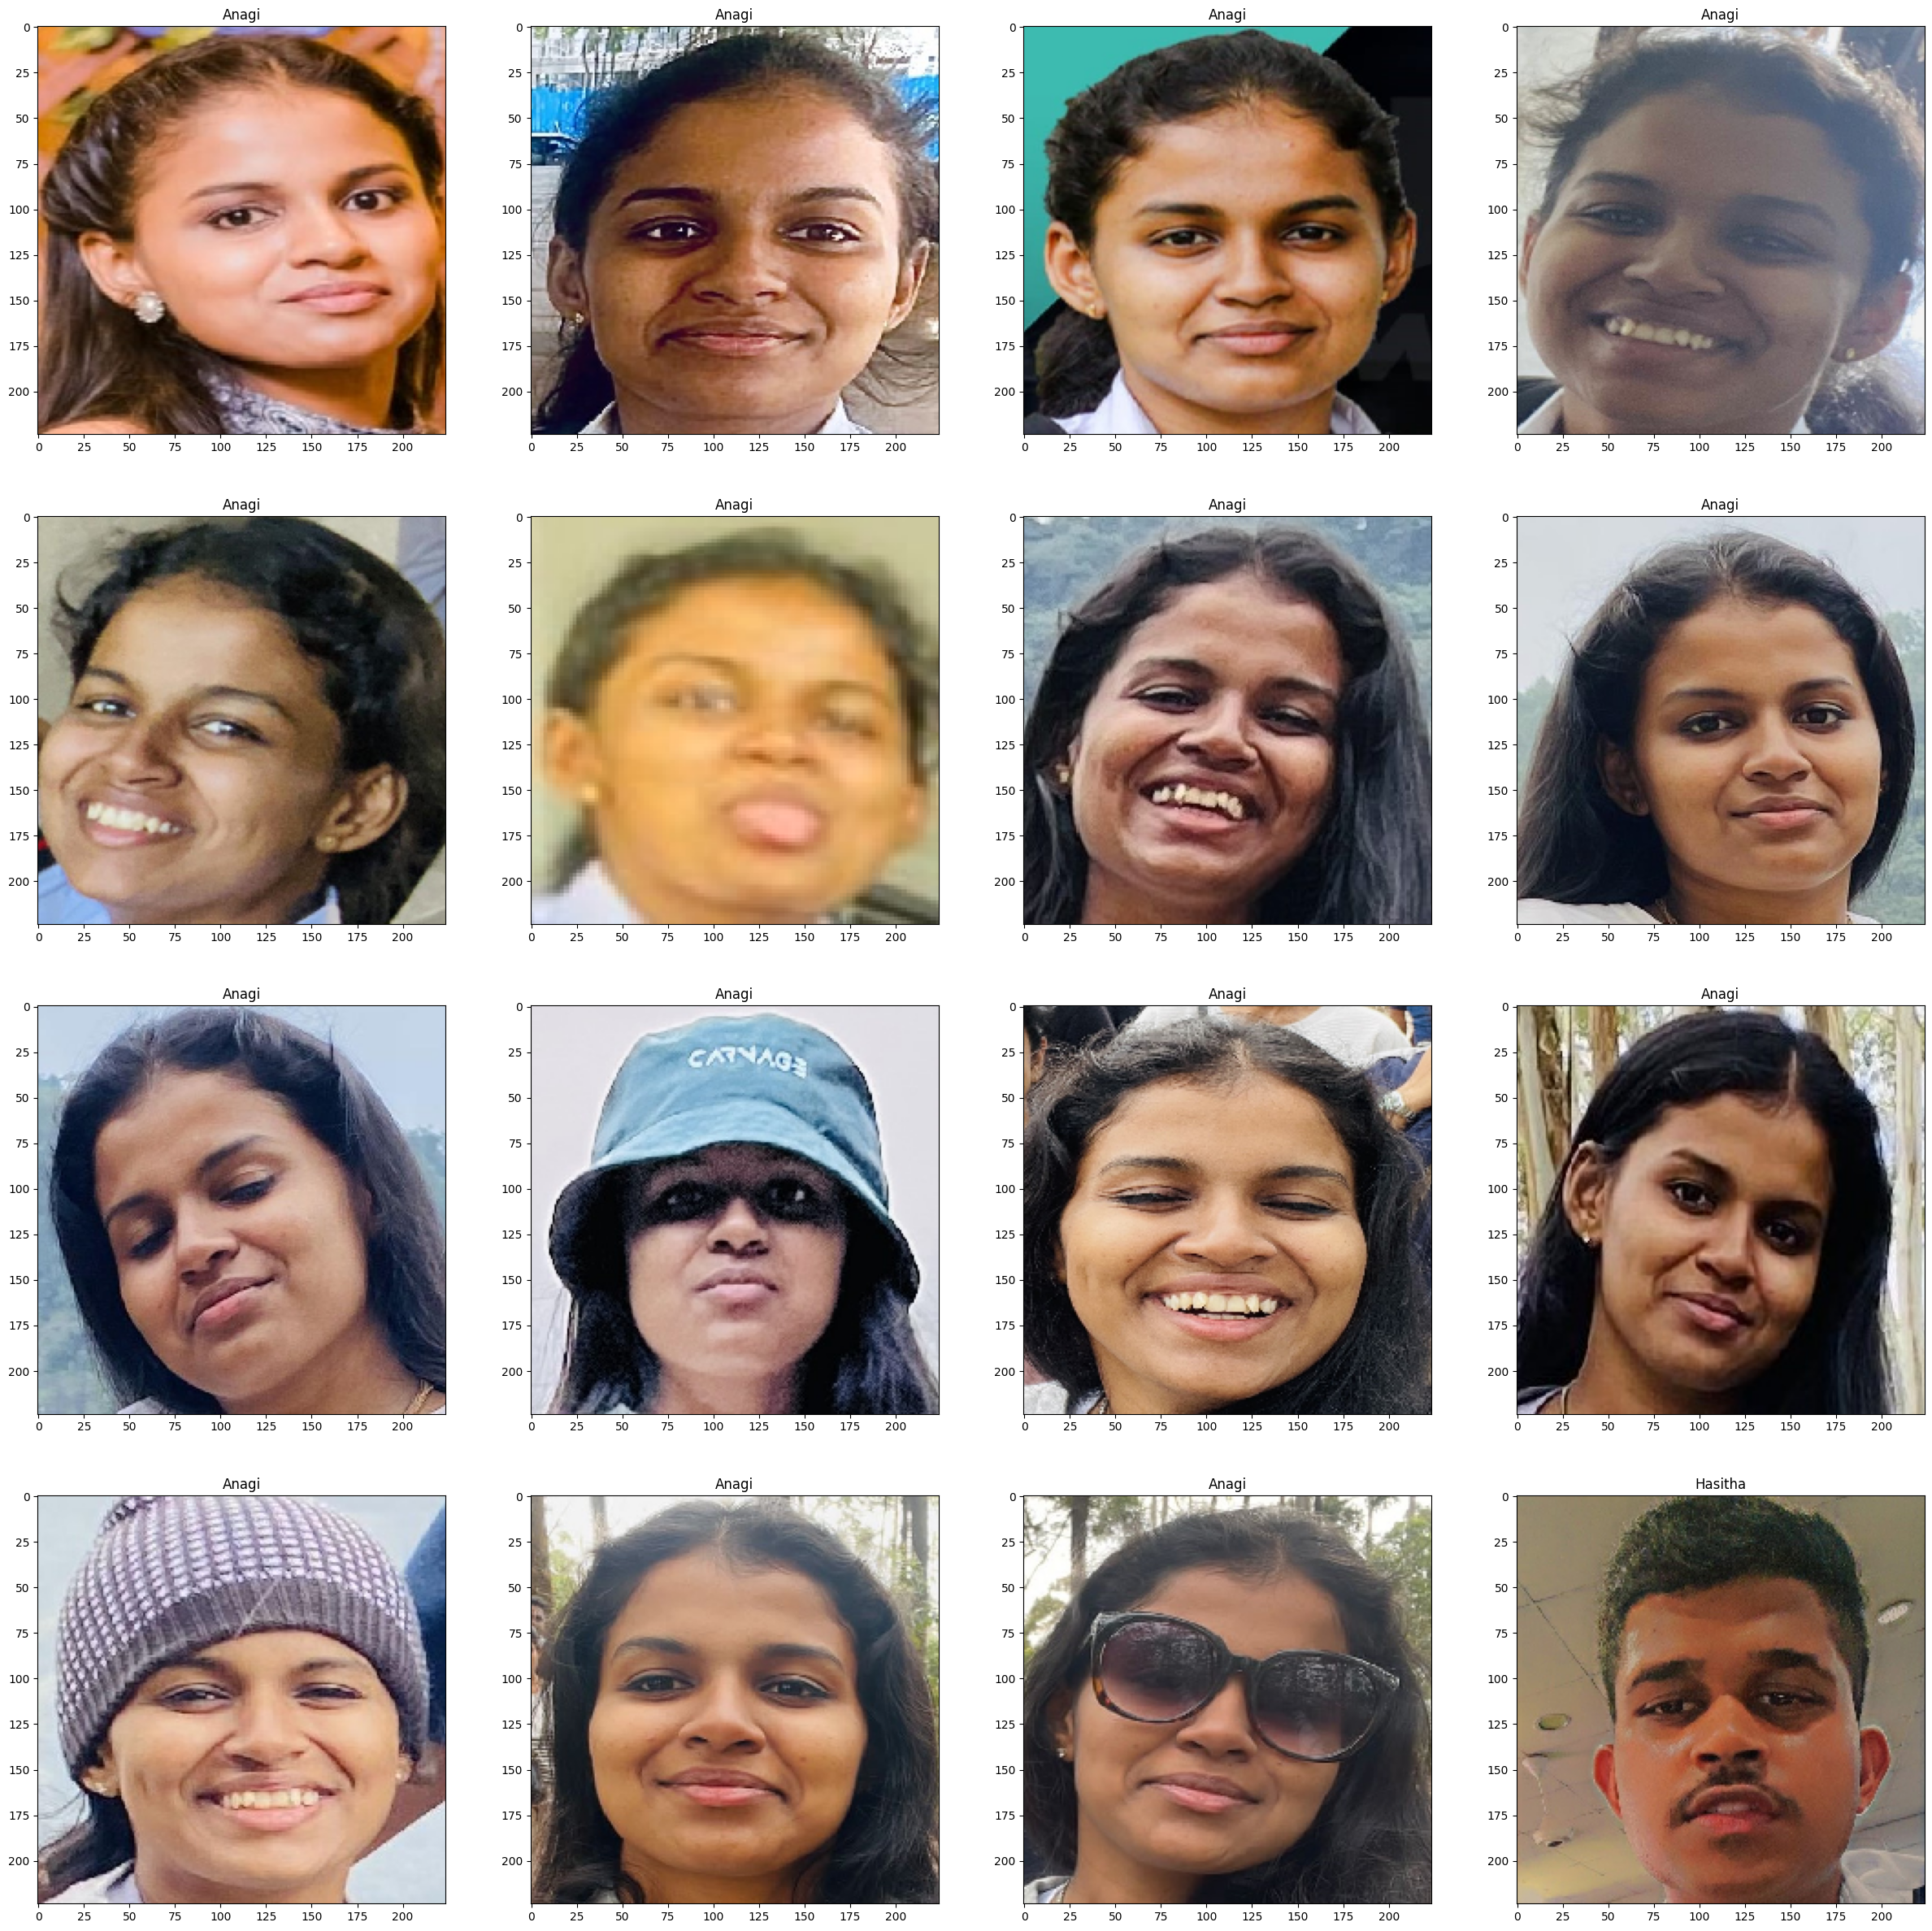

In [4]:
classes=list(Train_Data.class_indices.keys())
plt.figure(figsize=(30,30))
for X_batch, y_batch in Train_Data:
    # create a grid of 7x7 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

# Model Architecture is sequential
def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    # Add zero padding to the input images
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    # The maxpooling layer reduces the spartial dimentions,
    # Maxpooling layer reduces the size of feature maps, making them more manageble
    # It help to prevent ovefitting by reducing the number of parameters.
    # Maxpooling layer makes feature detection invariant to sccale and orientation changes
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [6]:
# Load the model using directory
model = vgg_face()

model.load_weights('C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\vgg_face_weights.h5')

In [7]:
from tensorflow.keras.models import Model
model = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_input (Inpu  [(None, 224, 224, 3)]     0         
 tLayer)                                                         
                                                                 
 zero_padding2d (ZeroPaddin  (None, 226, 226, 3)       0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 226, 226, 64)      0         
 ing2D)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                             

In [9]:
embedding_vector = model.predict(Train_Data,steps=len(Train_Data), verbose=1)

5/5 [==============================] - 6s 1s/step


In [10]:
y_train=Train_Data.labels

In [11]:
np.save('C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\Xdata',embedding_vector)

In [12]:
np.save('C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\ydata',y_train)

In [13]:
embedding_vector = np.load('C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\Xdata.npy')
y_train = np.load('C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\ydata.npy')

In [14]:
embedding_vector[0]

array([ 0.02086747,  0.03042901,  0.00854931, ..., -0.00894434,
        0.01793354,  0.02063474], dtype=float32)

In [15]:
y_train[0]

0

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(embedding_vector,y_train,test_size=0.1,shuffle=True, stratify=y_train,random_state=42)

In [17]:
pip install -U scikit-learn scipy matplotlib

     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
     --------------------------------------- 0.0/11.0 MB 435.7 kB/s eta 0:00:26
     --------------------------------------- 0.0/11.0 MB 393.8 kB/s eta 0:00:28
     --------------------------------------- 0.1/11.0 MB 512.0 kB/s eta 0:00:22
     --------------------------------------- 0.1/11.0 MB 504.4 kB/s eta 0:00:22
      -------------------------------------- 0.1/11.0 MB 532.5 kB/s eta 0:00:21
      -------------------------------------- 0.2/11.0 MB 579.6 kB/s eta 0:00:19
      -------------------------------------- 0.2/11.0 MB 562.0 kB/s eta 0:00:20
      -------------------------------------- 0.2/11.0 MB 551.4 kB/s eta 0:00:20
      -------------------------------------- 0.2/11.0 MB 580.1 kB/s eta 0:00:19
      -------------------------------------- 0.3/11.0 MB 542.5 kB/s eta 0:00:20
      -------------------------------------- 0.3/11.0 MB

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\Lib\\site-packages\\~cipy.libs\\libopenblas_v0.3.20-571-g3dec11c6-gcc_10_3_0-c2315440d6b6cef5037bad648efc8c59.dll'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\Hasitha\Desktop\kanikaSir\facenamedetection\Scripts\python.exe -m pip install --upgrade pip


In [18]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [19]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=67)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [21]:
X_train.shape

(67, 67)

In [22]:
from sklearn.svm import SVC

clf = SVC(kernel='linear',C=2.,class_weight='balanced',decision_function_shape='ovo',probability=True)
clf.fit(X_train, y_train)

SVC(C=2.0, class_weight='balanced', decision_function_shape='ovo',
    kernel='linear', probability=True)

In [23]:
y_predict = clf.predict(X_test)

In [24]:
y_predict[:5]

array([3, 3, 2, 4, 0])

In [25]:
# Find the classification accuracy
from sklearn.metrics import accuracy_score
print(f'The Accuracy of VGGFace2 is {accuracy_score(y_test,y_predict)*100} %')

The Accuracy of VGGFace2 is 87.5 %


<Axes: >

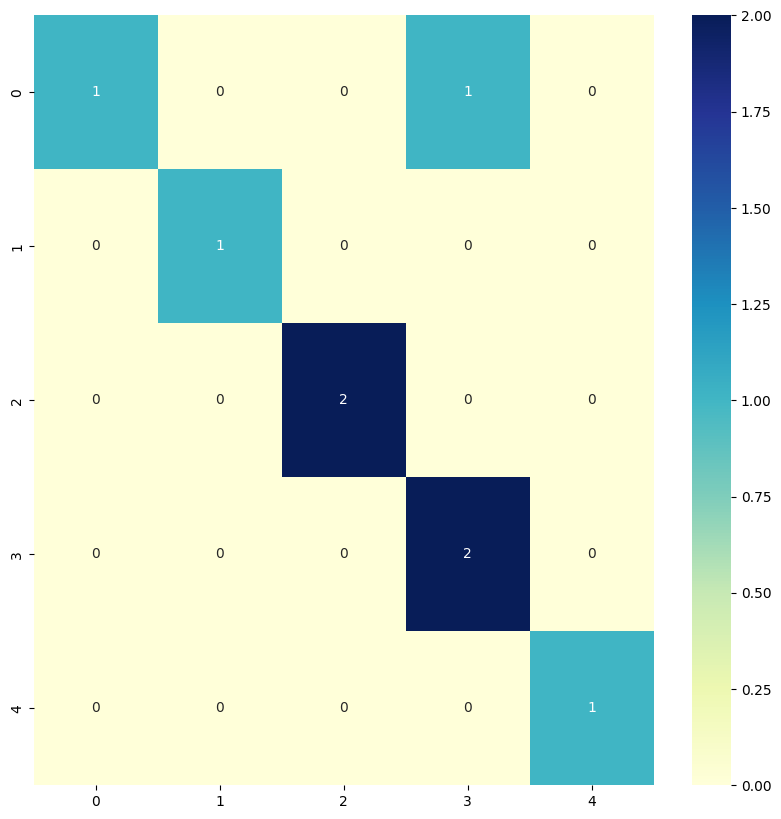

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(10,10))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         1

    accuracy                           0.88         8
   macro avg       0.93      0.90      0.89         8
weighted avg       0.92      0.88      0.87         8



In [28]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
y_predict_1 = DTC.predict(X_test)

In [30]:
y_predict_1[:5]

array([3, 3, 2, 4, 0])

In [31]:
# Find the classification accuracy
from sklearn.metrics import accuracy_score
print(f'The Accuracy of VGGFace2 is {accuracy_score(y_test,y_predict_1)*100} %')

The Accuracy of VGGFace2 is 100.0 %


<Axes: >

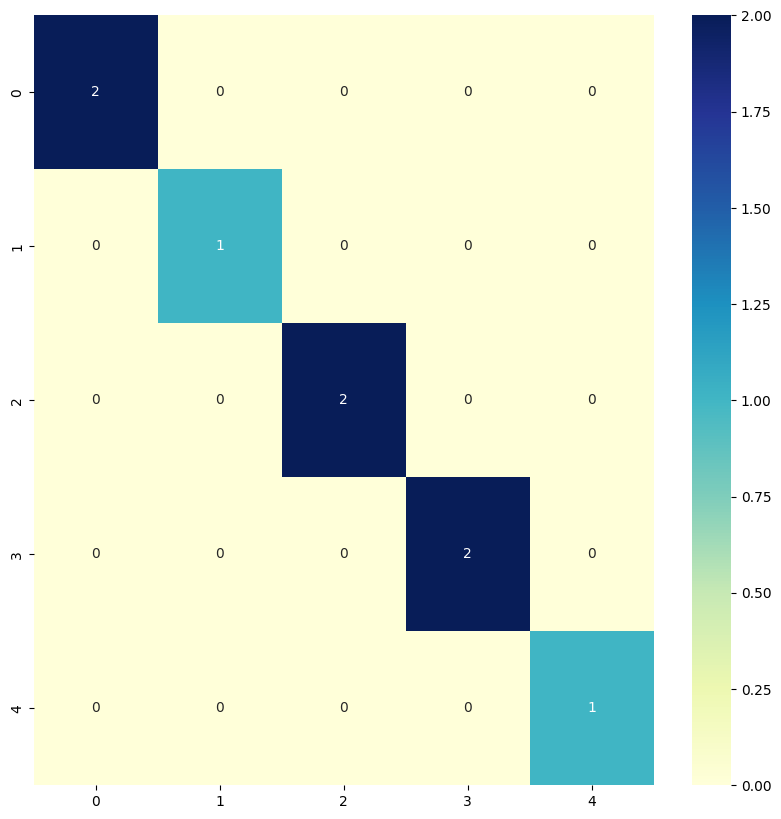

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict_1)
plt.figure(figsize=(10,10))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [33]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_predict_2 = RFC.predict(X_test)

In [35]:
y_predict_2[:5]

array([3, 3, 2, 4, 0])

In [36]:
# Find the classification accuracy
from sklearn.metrics import accuracy_score
print(f'The Accuracy of VGGFace2 is {accuracy_score(y_test,y_predict_2)*100} %')

The Accuracy of VGGFace2 is 100.0 %


<Axes: >

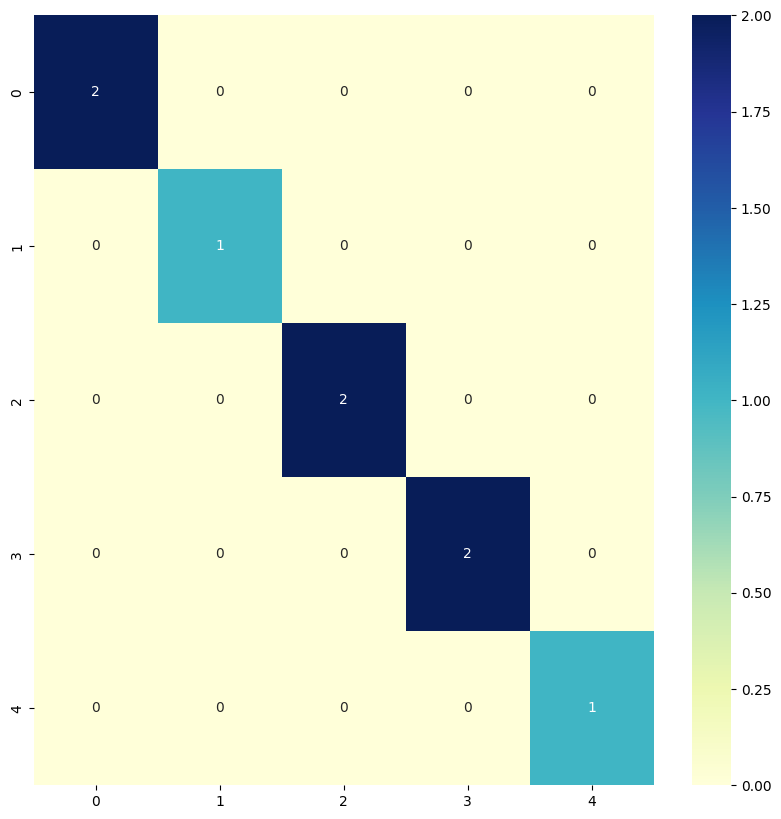

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict_2)
plt.figure(figsize=(10,10))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [38]:
from numpy import expand_dims
from cv2 import resize,INTER_CUBIC
from tensorflow.keras.preprocessing.image import  img_to_array

def preprocess_image(img):
    img = img_to_array(img)
    img = img/255.0
    img = expand_dims(img, axis=0)
    return img

def Face_Recognition(roi,model,scaler,pca,clf):
    roi=resize(roi,dsize=(224,224),interpolation=INTER_CUBIC)
    roi=preprocess_image(roi)
    embedding_vector = model.predict(roi)[0]

    embedding_vector=scaler.transform(embedding_vector.reshape(1, -1))
    embedding_vector_pca = pca.transform(embedding_vector)
    result1 = clf.predict(embedding_vector_pca)[0]
    #print(result1)
    y_predict = clf.predict_proba(embedding_vector_pca)[0]
    #print(y_predict)
    
    result = np.where(y_predict > 0.3)[0]
    
    return result , y_predict

In [39]:
print((list(Train_Data.class_indices.keys())))

['Anagi', 'Hasitha', 'Ramith', 'Sankalpa', 'Shakya']


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN
import cv2

mtcnn = MTCNN(image_size=160, margin=14, min_face_size=20, device='cpu', post_process=False)

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 600)  # Reduced height
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 800)   # Reduced width
classes = {'Anagi': 0, 'Hasitha': 1, 'Ramith': 2, 'Sankalpa': 3, 'Shakya': 4}


def ImageClass(n):
    for x, y in classes.items():
        if n == y:
            return x

size = (800, 600)  # Reduced size

result_video = cv2.VideoWriter('C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\Face.avi',
                               cv2.VideoWriter_fourcc(*'MJPG'),
                               10, size)
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
color = (255, 0, 0)
thickness = 2
other = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (800, 600), interpolation=cv2.INTER_CUBIC)  # Reduced size
    frame = cv2.GaussianBlur(frame, ksize=(3, 3), sigmaX=0)
    frame_face = frame.copy()
    frame_face = cv2.resize(frame_face, (640, 640), interpolation=cv2.INTER_CUBIC)
    boxes, probs = mtcnn.detect(frame_face, landmarks=False)

    if not probs.all() == None and probs.all() > 0.6:
        for x1, y1, x2, y2 in boxes:
            x1, x2, y1, y2 = int(x1) * 800 // 640, int(x2) * 800 // 640, int(y1) * 600 // 640, int(y2) * 600 // 640
            roi = frame[y1:y2, x1:x2]
            result, y_predict = Face_Recognition(roi, model, scaler, pca, clf)
            if len(result) > 1:
                cv2.putText(frame, ImageClass(result[0]), (x1 - 5, y1 - 5), font, fontScale, color, thickness,
                            cv2.LINE_AA)
                cv2.putText(frame, str(np.round(y_predict[result[0]], 2)), (x2, y2 - 10), font, fontScale, color,
                            thickness, cv2.LINE_AA)
            elif len(result) == 0:
                roi = cv2.cvtColor(roi, cv2.COLOR_RGB2BGR)
                cv2.imwrite(f'C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\Pic{other}.png', roi)
                cv2.putText(frame, 'Other', (x1 - 5, y1 - 5), font, fontScale, color, thickness, cv2.LINE_AA)
                other = other + 1
            else:
                cv2.putText(frame, ImageClass(result), (x1 - 5, y1 - 5), font, fontScale, color, thickness,
                            cv2.LINE_AA)
                cv2.putText(frame, str(np.round(y_predict[result[0]], 2)), (x2, y2 - 10), font, fontScale, color,
                            thickness, cv2.LINE_AA)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    result_video.write(frame)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
result_video.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 274ms/step


In [ ]:
pip install facenet-pytorch

In [44]:
from joblib import dump

In [45]:
dump(scaler, 'C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\scaler.joblib') 

['C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\scaler.joblib']

In [46]:
dump(pca, 'C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\pca_model.joblib')

['C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\pca_model.joblib']

In [47]:
dump(clf, 'C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\SVC.joblib') 

['C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\SVC.joblib']

In [48]:
import numpy as np
import cv2
import os
import tensorflow as tf
from joblib import  load

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [50]:
model = vgg_face()

model.load_weights('C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\vgg_face_weights.h5')

In [51]:
from tensorflow.keras.models import Model
model = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [52]:
scaler=load( 'C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\scaler.joblib') 

In [53]:
pca=load( 'C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\pca_model.joblib') 

In [54]:
clf=load( 'C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\SVC.joblib') 

In [55]:
from numpy import expand_dims
from cv2 import resize,INTER_CUBIC
from tensorflow.keras.preprocessing.image import  img_to_array

def preprocess_image(img):
    img = img_to_array(img)
    img = img/255.0
    img = expand_dims(img, axis=0)
    return img

def Face_Recognition(roi,model,scaler,pca,clf):
    roi=resize(roi,dsize=(224,224),interpolation=INTER_CUBIC)
    roi=preprocess_image(roi)
    embedding_vector = model.predict(roi)[0]

    embedding_vector=scaler.transform(embedding_vector.reshape(1, -1))
    embedding_vector_pca = pca.transform(embedding_vector)
    result1 = clf.predict(embedding_vector_pca)[0]
    #print(result1)
    y_predict = clf.predict_proba(embedding_vector_pca)[0]
    #print(y_predict)
    
    result = np.where(y_predict > 0.3)[0]
    
    return result , y_predict

# REAL TIME DETECTION

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN
import cv2

mtcnn = MTCNN(image_size=160, margin=14, min_face_size=20, device='cpu', post_process=False)

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 600)  # Reduced height
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 800)   # Reduced width
classes = {'Anagi': 0, 'Hasitha': 1, 'Ramith': 2, 'Sankalpa': 3, 'Shakya': 4}


def ImageClass(n):
    for x, y in classes.items():
        if n == y:
            return x

size = (800, 600)  # Reduced size

result_video = cv2.VideoWriter('C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\Face.avi',
                               cv2.VideoWriter_fourcc(*'MJPG'),
                               10, size)
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
color = (255, 0, 0)
thickness = 2
other = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (800, 600), interpolation=cv2.INTER_CUBIC)  # Reduced size
    frame = cv2.GaussianBlur(frame, ksize=(3, 3), sigmaX=0)
    frame_face = frame.copy()
    frame_face = cv2.resize(frame_face, (640, 640), interpolation=cv2.INTER_CUBIC)
    boxes, probs = mtcnn.detect(frame_face, landmarks=False)

    if not probs.all() == None and probs.all() > 0.6:
        for x1, y1, x2, y2 in boxes:
            x1, x2, y1, y2 = int(x1) * 800 // 640, int(x2) * 800 // 640, int(y1) * 600 // 640, int(y2) * 600 // 640
            roi = frame[y1:y2, x1:x2]
            result, y_predict = Face_Recognition(roi, model, scaler, pca, clf)
            if len(result) > 1:
                cv2.putText(frame, ImageClass(result[0]), (x1 - 5, y1 - 5), font, fontScale, color, thickness,
                            cv2.LINE_AA)
                cv2.putText(frame, str(np.round(y_predict[result[0]], 2)), (x2, y2 - 10), font, fontScale, color,
                            thickness, cv2.LINE_AA)
            elif len(result) == 0:
                roi = cv2.cvtColor(roi, cv2.COLOR_RGB2BGR)
                cv2.imwrite(f'Pic{other}.png', roi)
                cv2.putText(frame, 'Other', (x1 - 5, y1 - 5), font, fontScale, color, thickness, cv2.LINE_AA)
                other = other + 1
            else:
                cv2.putText(frame, ImageClass(result), (x1 - 5, y1 - 5), font, fontScale, color, thickness,
                            cv2.LINE_AA)
                cv2.putText(frame, str(np.round(y_predict[result[0]], 2)), (x2, y2 - 10), font, fontScale, color,
                            thickness, cv2.LINE_AA)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    result_video.write(frame)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
result_video.release()
cv2.destroyAllWindows()


NameError: name 'scaler' is not defined

# for one image without realTime

1/1 [==============================] - 0s 280ms/step
Shakya
1/1 [==============================] - 0s 252ms/step
Hasitha


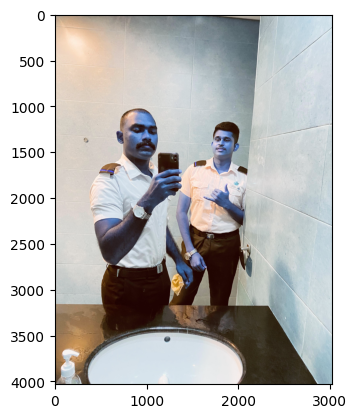

In [46]:
import numpy as np
import cv2
# This is use to detect the face as region of interest
from facenet_pytorch import MTCNN

mtcnn = MTCNN(image_size=160, margin=14, min_face_size=20, device='cpu', post_process=False)
classes = {'Anagi': 0, 'Hasitha': 1, 'Ramith': 2, 'Sankalpa': 3, 'Shakya': 4}

def ImageClass(n):
    for x, y in classes.items():
        if n == y:
            # for print the names
            print(x)
            return x

        # Inlcude the image for checking
frame =cv2.imread('C:\\Users\\Hasitha\\Desktop\\kanikaSir\\facenamedetection\\2022_09_05_10_55_IMG_7466.JPG')  # Provide the path to your image file

plt.imshow(frame) # some color change filter

# Conver the color spaces as corrected way
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# Resize the image to a smaller size 
frame = cv2.resize(frame, (800, 600), interpolation=cv2.INTER_CUBIC)  # Reduced size
# Applied Gausian blur to the image 
frame = cv2.GaussianBlur(frame, ksize=(3, 3), sigmaX=0)
# Create the copy of the preprocessed frame
frame_face = frame.copy()
# Resize the frame face
frame_face = cv2.resize(frame_face, (640, 640), interpolation=cv2.INTER_CUBIC)
# Detect faces and resize the faces 
boxes, probs = mtcnn.detect(frame_face, landmarks=False)

if not probs.all() == None and probs.all() > 0.6:frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = cv2.resize(frame, (800, 600), interpolation=cv2.INTER_CUBIC)  # Reduced size
frame = cv2.GaussianBlur(frame, ksize=(3, 3), sigmaX=0)
frame_face = frame.copy()
frame_face = cv2.resize(frame_face, (640, 640), interpolation=cv2.INTER_CUBIC)
boxes, probs = mtcnn.detect(frame_face, landmarks=False)
    for x1, y1, x2, y2 in boxes:
        x1, x2, y1, y2 = int(x1) * 800 // 640, int(x2) * 800 // 640, int(y1) * 600 // 640, int(y2) * 600 // 640
        roi = frame[y1:y2, x1:x2]
        # Assuming Face_Recognition function is defined elsewhere
        result, y_predict = Face_Recognition(roi, model, scaler, pca, clf)
        if len(result) > 1:
            cv2.putText(frame, ImageClass(result[0]), (x1 - 5, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            cv2.putText(frame, str(np.round(y_predict[result[0]], 2)), (x2, y2 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        elif len(result) == 0:
            cv2.putText(frame, 'Other', (x1 - 5, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        else:
            cv2.putText(frame, ImageClass(result), (x1 - 5, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            cv2.putText(frame, str(np.round(y_predict[result[0]], 2)), (x2, y2 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
cv2.imshow('image', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Get Access to the FireBase


# Pass DATA to the FIREBASE